In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x_train.shape


(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

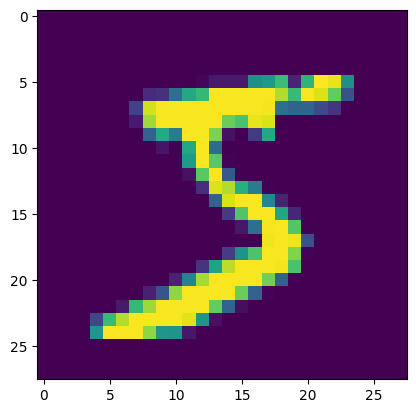

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]
           )

converting that pixel values of every image in (0-1) range (every image is 28*28
)

In [ ]:
x_train = x_train/255
x_test = x_test/255

creating model

In [ ]:
model = Sequential()

our image is 28*28 formate we have to pass total 128 input as 128 pixels so for that formate must in (128,1) for that we will be using fatten

In [ ]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary(
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

means input layer has 128 neuron which take input forwrding towards 10 neurons in next layer which final layer for 0-9 10 neurons ok

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8612 - loss: 0.4848 - val_accuracy: 0.9528 - val_loss: 0.1659
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9574 - loss: 0.1452 - val_accuracy: 0.9629 - val_loss: 0.1273
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9718 - loss: 0.0960 - val_accuracy: 0.9681 - val_loss: 0.1077
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9794 - loss: 0.0707 - val_accuracy: 0.9712 - val_loss: 0.0998
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9837 - loss: 0.0530 - val_accuracy: 0.9720 - val_loss: 0.0941
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9887 - loss: 0.0376 - val_accuracy: 0.9726 - val_loss: 0.0945
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9914 - loss: 0.0298 - val_accuracy: 0.9739 - val_loss: 0.0900
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9930 - loss: 0.0243

In [ ]:
pred = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
predicted_values = pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted_values)

0.9775

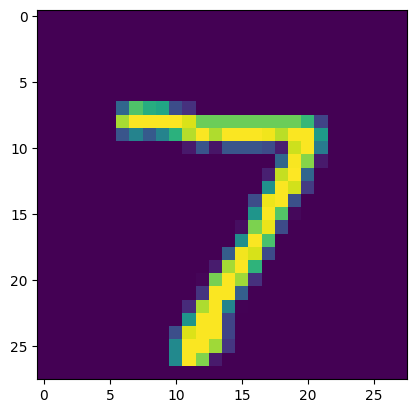

In [ ]:
plt.imshow(x_test[0])

In [ ]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([7])

correct prected output

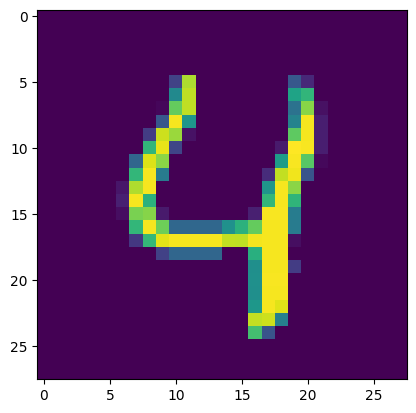

In [ ]:
plt.imshow(x_test[4])

In [ ]:
model.predict(x_test[4].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([4])

Graduate Adimission prediction ANN Regression model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline as line

In [ ]:
df = pd.read_csv('Admission_Predict.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [ ]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns=['Serial No.'],inplace=True)

In [ ]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

creating regression model

In [ ]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147 (588.00 B)

 Trainable params: 147 (588.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
history = model.fit(x_train_scaled,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.5718 - mean_absolute_error: 0.7405 - val_loss: 0.5791 - val_mean_absolute_error: 0.7439
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5415 - mean_absolute_error: 0.7200 - val_loss: 0.5235 - val_mean_absolute_error: 0.7065
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4730 - mean_absolute_error: 0.6719 - val_loss: 0.4675 - val_mean_absolute_error: 0.6669
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4189 - mean_absolute_error: 0.6314 - val_loss: 0.4103 - val_mean_absolute_error: 0.6237
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3546 - mean_absolute_error: 0.5791 - val_loss: 0.3493 - val_mean_absolute_error: 0.5742
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2979 - mean_absolute_error: 0.5272 - val_loss: 0.2851 - val_mean_absolute_error: 0.5171
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2286 - mean_absolute_error: 0.4574 - val_loss: 0.2205 - val

In [ ]:
y_pred = model.predict(x_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step 


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.4197222954069315

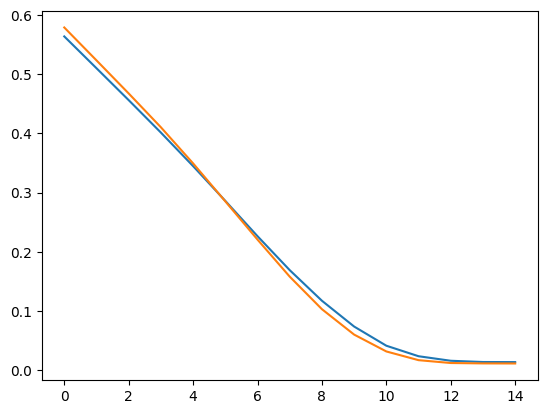

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()